# Area plot using pandas
* <code>df.plot(kind='area',...)</code>
* [pandas docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

------------
### Import data

In [2]:
df=pd.read_csv("data\Compustat_from_1990.csv")[['fyear', 'tic', 'mv']] # mv is already in million dollars.
df['mv']= df['mv']/1000 # mv is now in billion dollars.
tickers= ['AAPL', 'AMZN', 'MSFT', 'TSLA']
df= df[df.tic.isin(tickers)]
df= df[df.fyear>=2000]
df.head()

,fyear,tic,mv
3525,2000,AAPL,8.643683
3526,2001,AAPL,5.442800
3527,2002,AAPL,5.204905
3528,2003,AAPL,7.598583
3529,2004,AAPL,15.168455


In [3]:
df.groupby('tic').size()

tic
AAPL    21
AMZN    21
MSFT    21
TSLA    13
dtype: int64

### Transform data

In [4]:
df_wide= pd.pivot(df, index= 'fyear', columns='tic', values='mv')
df_wide.index= df_wide.index.map(str)
df_wide.head()

tic,AAPL,AMZN,MSFT,TSLA
fyear,,,,
2000,8.643683,5.557991,422.64000,NaN
2001,5.442800,4.038219,392.95900,NaN
2002,5.204905,7.327544,293.13730,NaN
2003,7.598583,21.224487,276.16844,NaN
2004,15.168455,18.146100,310.21872,NaN


-------------
## Visualizaion using pandas' plot() method

In [5]:
x_ticks= list(map(str,range(2000,2021)))

Text(0.5, 1.0, 'Market cap of \nApple, Amazon, Microsoft, and Tesla')

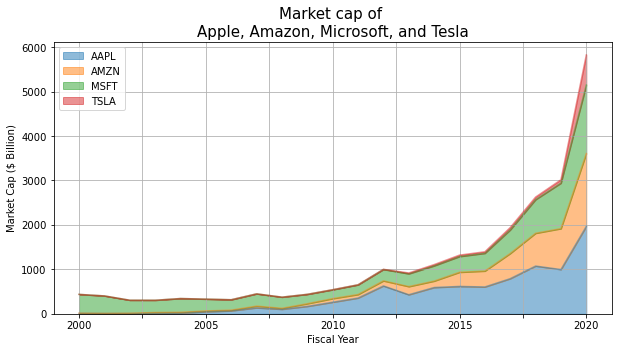

In [6]:
ax= df_wide.plot(kind='area',
            figsize= (10,5),
            alpha=0.5,
            grid=True)
ax.set_xlabel("Fiscal Year")
ax.set_ylabel("Market Cap ($ Billion)")
ax.legend(loc='upper left')
ax.set_title("Market cap of \nApple, Amazon, Microsoft, and Tesla", fontsize= 15)

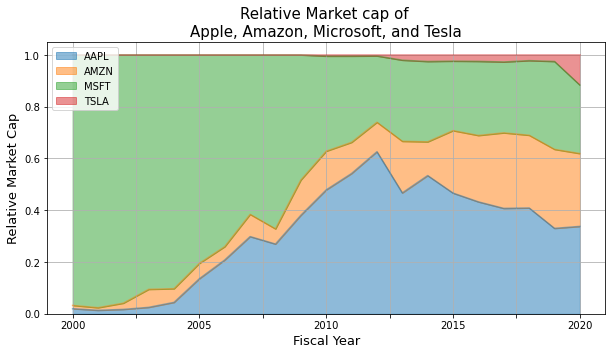

In [7]:
df_wide_normalize= df_wide.div(df_wide.sum(axis=1), axis=0)
ax= df_wide_normalize.plot(kind='area',
            figsize= (10,5),
            alpha=0.5,
            grid=True)
ax.set_xlabel("Fiscal Year", size= 13)
ax.set_ylabel("Relative Market Cap", size= 13)
ax.set_title("Relative Market cap of \nApple, Amazon, Microsoft, and Tesla", fontsize= 15)
ax.legend(loc='upper left')
plt.show()

---------------